In [113]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import PolynomialFeatures
import os

In [114]:
columns = pd.read_csv('DATA.csv').iloc[1]

In [115]:
df = pd.read_csv('DATA.csv', header = 2)
df = df.drop([0])
df = df.drop([6031])
df

,Дата,Скважина,Пласт,Куст,Цех,Тип скважины,Диаметр экспл.колонны,Диаметр НКТ,Диаметр штуцера,Глубина верхних дыр перфорации,...,ГП - Забойное давление,ГП(ИДН) Дебит жидкости,ГП(ИДН) Дебит жидкости скорр-ый,ГП(ИДН) Дебит нефти,ГП(ИДН) Прирост дефита нефти,ГП(ГРП) Дебит жидкости,ГП(ГРП) Дебит жидкости скорр-ый,ГП(ГРП) Дебит нефти,ГП(ГРП) Прирост дефита нефти,ГП - Общий прирост Qн
1,01.2019,"""896Б""",БС10,109,ЦДHГ-1,Наклонно-направленно,"124,00","73,00","32,00","2 744,00",...,"22,00","74,35","74,35","2,18","0,10","305,07","305,07","8,96","6,78","6,87"
2,01.2019,"""896Б""",БС10,109,ЦДHГ-1,Наклонно-направленно,"124,00","73,00","32,00","2 682,00",...,"22,00","81,77","81,77","0,92","0,02","296,41","296,41","3,34","2,42","2,44"
3,02.2019,"""896Б""",БС10,109,ЦДHГ-1,Наклонно-направленно,"124,00","73,00","32,00","2 744,00",...,"22,00","86,63","86,63","2,22","0,16","341,29","341,29","8,73","6,51","6,67"
4,02.2019,"""896Б""",БС10,109,ЦДHГ-1,Наклонно-направленно,"124,00","73,00","32,00","2 682,00",...,"22,00","95,76","95,76","0,94","0,05","334,01","334,01","3,27","2,33","2,38"
5,04.2019,"""896Б""",БС10,109,ЦДHГ-1,Наклонно-направленно,"124,00","73,00","32,00","2 744,00",...,"22,00","72,50","72,50","1,58","0,16","299,29","299,29","6,52","4,94","5,10"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6026,11.2018,990,БС10,107,ЦДHГ-1,Наклонно-направленно,"128,00","73,00","32,00","2 680,00",...,"21,00","144,33","144,33","2,48","0,57","591,57","591,57","10,15","7,67","8,25"
6027,11.2019,990,БС10,107,ЦДHГ-1,Наклонно-направленно,"128,00","73,00","32,00","2 680,00",...,"22,40","125,36","125,36","2,15","0,35","516,05","516,05","8,86","6,70","7,05"
6028,12.2018,990,БС10,107,ЦДHГ-1,Наклонно-направленно,"128,00","73,00","32,00","2 680,00",...,"22,00","155,52","155,52","2,67","0,63","604,22","604,22","10,37","7,70","8,33"
6029,12.2019,990,БС10,107,ЦДHГ-1,Наклонно-направленно,"128,00","73,00","32,00","2 680,00",...,"20,50","126,29","126,29","2,17","0,37","521,97","521,97","8,96","6,79","7,16"


In [116]:
# пласт давл, коэф прод, время

In [117]:
df.columns.values

array(['Дата', 'Скважина', 'Пласт', 'Куст', 'Цех', 'Тип скважины',
       'Диаметр экспл.колонны', 'Диаметр НКТ', 'Диаметр штуцера',
       'Глубина верхних дыр перфорации', 'Удлинение',
       'Способ эксплуатации', 'Тип насоса', 'Производительность ЭЦН',
       'Напор', 'Частота', 'Коэффициент сепарации', 'Глубина спуска',
       'Буферное давление', 'Давление в линии', 'Пластовое давление',
       'Динамическая высота', 'Затрубное давление', 'Давление на приеме',
       'Забойное давление', 'Дебит нефти', 'Дебит жидкости',
       'Обводненность', 'Состояние на конец месяца', 'Давление наcыщения',
       'Газовый фактор', 'Температура пласта', 'SKIN', 'JD факт',
       'Дата ГРП', 'Фирма ГРП', 'Вязкость нефти в пластовых условиях',
       'Вязкость воды в пластовых условиях',
       'Вязкость жидкости в пласт. условиях', 'объемный коэффициент',
       'Плотность нефти', 'Плотность воды', 'Высота перфорации',
       'Удельный коэффициент', 'Коэффициент продуктивности',
       'ТП - За

In [118]:
plast = df[['Дата', 'Скважина', 'Пласт', 'Пластовое давление', 'Коэффициент продуктивности']].copy()
plast

,Дата,Скважина,Пласт,Пластовое давление,Коэффициент продуктивности
1,01.2019,"""896Б""",БС10,"209,20","0,41"
2,01.2019,"""896Б""",БС10,"203,70","0,46"
3,02.2019,"""896Б""",БС10,"209,20","0,48"
4,02.2019,"""896Б""",БС10,"203,70","0,53"
5,04.2019,"""896Б""",БС10,"207,30","0,40"
...,...,...,...,...,...
6026,11.2018,990,БС10,"213,89","0,77"
6027,11.2019,990,БС10,"193,00","0,76"
6028,12.2018,990,БС10,"193,00","0,94"
6029,12.2019,990,БС10,"195,00","0,75"


In [119]:
f = plast['Дата']
pust = []
for i in f:
  splitted = i.split('.')
  if len(splitted[0]) == 2:
    d = datetime.strptime(f"{splitted[0]+'.'+splitted[1]}", "%m.%Y").timestamp()
  else:
    d = datetime.strptime(f"{splitted[1]+'.'+splitted[0]}", "%m.%Y").timestamp()
  pust.append(d)
  # print(splitted[0]+'.'+splitted[1])
plast['Дата'] = pust

In [120]:
plast['Пластовое давление'] = plast['Пластовое давление'].map(lambda x: float(x.replace(',', '.')))
plast['Коэффициент продуктивности'] = plast['Коэффициент продуктивности'].map(lambda x: float(x.replace(',', '.')))
plast

,Дата,Скважина,Пласт,Пластовое давление,Коэффициент продуктивности
1,1.546301e+09,"""896Б""",БС10,209.20,0.41
2,1.546301e+09,"""896Б""",БС10,203.70,0.46
3,1.548979e+09,"""896Б""",БС10,209.20,0.48
4,1.548979e+09,"""896Б""",БС10,203.70,0.53
5,1.554077e+09,"""896Б""",БС10,207.30,0.40
...,...,...,...,...,...
6026,1.541030e+09,990,БС10,213.89,0.77
6027,1.572566e+09,990,БС10,193.00,0.76
6028,1.543622e+09,990,БС10,193.00,0.94
6029,1.575158e+09,990,БС10,195.00,0.75


In [121]:
plast['Скважина'].unique()

array(['"896Б"', '1000', '1002', '1015', '1024', '1039', '105', '1056',
       '1059', '1063', '1068', '1075', '1077', '1078', '1087', '1094',
       '1097', '110', '1102', '1115Б', '1116', '1119', '113А', '1147',
       '114Б', '1158', '115Б', '115Р', '118', '1199', '1200', '1201',
       '1202', '1247', '1247Г', '1248', '1249', '128', '132', '1351',
       '1355', '1371', '1396', '143', '144', '1447', '146', '1473', '149',
       '162', '163', '164', '177', '181', '2000', '2006', '2007', '201',
       '2024', '203', '2050', '2057', '2058', '2078', '2080', '2081',
       '2096', '2101', '2103', '2108', '211', '2110', '2111', '2117',
       '2118', '2119', '2121', '2126', '2128', '2143', '2146', '2152',
       '2165', '217', '2175', '2180', '2183', '2184', '2188Б', '2190',
       '2206', '2210', '2211', '2212', '2215', '2228', '2234', '2235',
       '2245', '224Б', '2258Б', '2260', '2264', '2270', '2275', '2276',
       '2277', '2278', '2280', '2284', '2293', '232', '233', '236', '240'

In [122]:
# gr = plast[plast['Скважина'] == '"896Б"']

gr = plast.groupby(['Скважина', 'Дата', 'Пласт']).mean().reset_index()
gr1 = gr[gr['Скважина'] == '1000']
# for date in gr['Дата']:
#   temp_data = gr[gr['Дата'] == date]['Пластовое давление'].mean()
#   print(temp_data)
gr1

,Скважина,Дата,Пласт,Пластовое давление,Коэффициент продуктивности
18,1000,1.525133e+09,БС10,182.50,1.90
19,1000,1.527811e+09,БС10,186.14,1.87
20,1000,1.530403e+09,БС10,186.14,1.90
21,1000,1.533082e+09,БС10,186.14,1.90
22,1000,1.535760e+09,БС10,190.30,1.80
23,1000,1.538352e+09,БС10,190.30,1.80
24,1000,1.541030e+09,БС10,190.30,1.76
25,1000,1.543622e+09,БС10,187.60,1.99
26,1000,1.546301e+09,БС10,187.60,2.01
27,1000,1.548979e+09,БС10,187.60,2.01


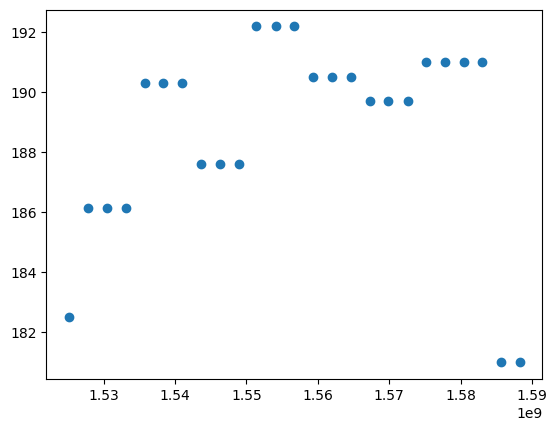

In [123]:
plt.scatter(gr1['Дата'], gr1['Пластовое давление'])

In [124]:
uniques = gr['Скважина'].unique()

In [125]:
gr = gr.drop(['Пласт'], axis = 1)
gr

,Скважина,Дата,Пластовое давление,Коэффициент продуктивности
0,"""896Б""",1.535760e+09,245.65,0.545
1,"""896Б""",1.538352e+09,245.65,0.425
2,"""896Б""",1.541030e+09,245.65,0.390
3,"""896Б""",1.543622e+09,206.45,0.460
4,"""896Б""",1.546301e+09,206.45,0.435
...,...,...,...,...
4394,990,1.577837e+09,195.00,0.750
4395,990,1.580515e+09,195.00,0.730
4396,990,1.583021e+09,195.00,0.720
4397,990,1.585699e+09,193.99,0.720


In [ ]:
models_list = {}

for i in uniques:
  df_temp = gr[gr['Скважина'] == i][['Дата', 'Пластовое давление', 'Коэффициент продуктивности']]
  # print(df_temp)
  if len(df_temp) < 10:
    continue

  X, y = df_temp['Дата'], df_temp[['Пластовое давление', 'Коэффициент продуктивности']]
  X = X.array.reshape(len(X),1)

  # X = np.asarray(X, dtype='float64')
  y = np.asarray(y, dtype='float64')
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12)

  # X_train = X_train.array.reshape(1, -1)
  # X_test = X_test.array.reshape(1, -1)

  model = LinearRegression()
  model.fit(X_train, y_train)
  prediction = model.predict(X_test)

  models_list[i] = model

  print(prediction, y_test)
  # print(i+'--------------------------')
  # print(X, y)
  # print('--------------------------')

In [127]:
models_list[uniques[0]]

LinearRegression()

In [128]:
# a = input()
# a = datetime.strptime(f"{a}", "%m.%Y").timestamp()
# a = np.array([a])
# a = a.reshape(1,1)
# pred = models_list[uniques[0]].predict(a)
# print(f"{uniques[0]} {models_list[uniques[0]].predict(a)}")

01.2020
"896Б" [[196.32355071   0.63718624]]


In [129]:
gr['Дата'].max()

1588291200.0

In [130]:
datetime.strptime("03.2020", "%m.%Y").timestamp()

1583020800.0

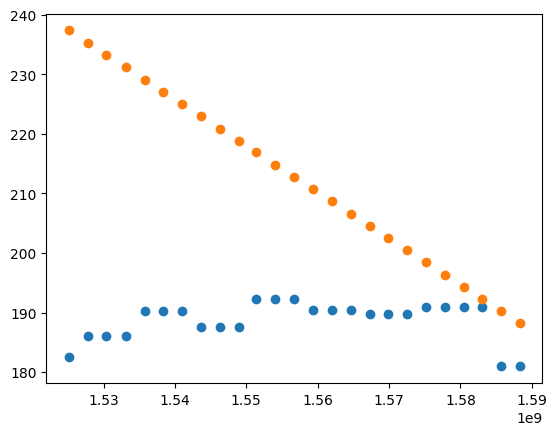

In [131]:
temp_df = pd.DataFrame(columns = ['Дата', 'Пластовое давление', 'Коэффициент продуктивности'])
# temp_df = gr1[['Дата', 'Пластовое давление', 'Коэффициент продуктивности']].copy()

for date in gr1['Дата']:
  a = date
  a = np.array([a])
  a = a.reshape(1,1)
  # print(date, models_list['"896Б"'].predict(a))
  temp_df.loc[ len(temp_df.index )] = [date, models_list['"896Б"'].predict(a)[0][0], models_list['"896Б"'].predict(a)[0][1]]


plt.scatter(gr1['Дата'], gr1['Пластовое давление'])
plt.scatter(temp_df['Дата'], temp_df['Пластовое давление'])

In [132]:
mean_absolute_percentage_error(gr1['Пластовое давление'], temp_df['Пластовое давление'])

0.12782927945740258

In [133]:
temp_df['Пластовое давление'], gr1['Пластовое давление']

(0     237.389022
 1     235.302089
 2     233.282475
 3     231.195541
 4     229.108608
 5     227.088994
 6     225.002060
 7     222.982447
 8     220.895513
 9     218.808579
 10    216.923607
 11    214.836673
 12    212.817060
 13    210.730126
 14    208.710513
 15    206.623579
 16    204.536645
 17    202.517032
 18    200.430098
 19    198.410485
 20    196.323551
 21    194.236617
 22    192.284324
 23    190.197390
 24    188.177777
 Name: Пластовое давление, dtype: float64,
 18    182.50
 19    186.14
 20    186.14
 21    186.14
 22    190.30
 23    190.30
 24    190.30
 25    187.60
 26    187.60
 27    187.60
 28    192.20
 29    192.20
 30    192.20
 31    190.50
 32    190.50
 33    190.50
 34    189.70
 35    189.70
 36    189.70
 37    191.00
 38    191.00
 39    191.00
 40    191.00
 41    180.98
 42    180.98
 Name: Пластовое давление, dtype: float64)

In [134]:
models_list = {}

for i in uniques:
  df_temp = gr[gr['Скважина'] == i][['Дата', 'Пластовое давление', 'Коэффициент продуктивности']]
  # print(df_temp)
  if len(df_temp) < 10:
    continue

  X, y = df_temp['Дата'], df_temp[['Пластовое давление', 'Коэффициент продуктивности']]

  X = np.array(X)
  y = np.array(y)
  poly = PolynomialFeatures(degree=3, include_bias=False)


  # X = X.array.reshape(len(X),1)
  # X = np.asarray(X, dtype='float64')
  y = np.asarray(y, dtype='float64')
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12)
  poly_features = poly.fit_transform(X_train.reshape(-1, 1))

  # X_train = X_train.array.reshape(1, -1)
  # X_test = X_test.array.reshape(1, -1)

  model = LinearRegression()
  model.fit(poly_features, y_train)
  prediction = model.predict(poly.fit_transform(X_test.reshape(-1, 1)))

  models_list[i] = model

  # print(prediction, y_test)

In [165]:
gr1 = gr[gr['Скважина'] == '105']
gr2 = gr1.copy()
gr2['Дата'] =
gr2

,Скважина,Дата,Пластовое давление,Коэффициент продуктивности
141,105,1.525133e+09,201.80,1.120
142,105,1.527811e+09,207.33,1.070
143,105,1.530403e+09,207.33,1.075
144,105,1.533082e+09,207.33,1.060
145,105,1.535760e+09,206.95,1.050
146,105,1.538352e+09,206.95,1.035
147,105,1.541030e+09,206.95,1.005
148,105,1.543622e+09,203.25,1.005
149,105,1.546301e+09,203.25,0.995
150,105,1.548979e+09,203.25,0.965


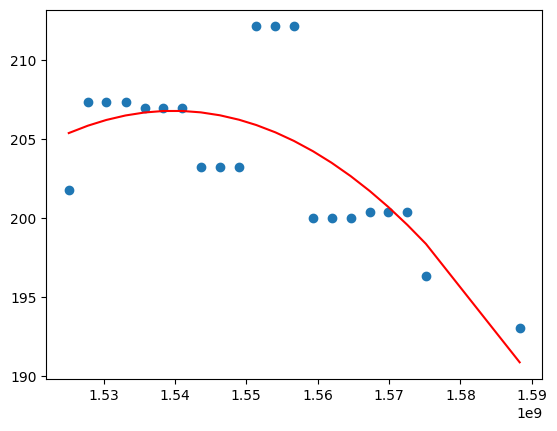

In [173]:
temp_df = pd.DataFrame(columns = ['Дата', 'Пластовое давление', 'Коэффициент продуктивности'])
# temp_df = gr1[['Дата', 'Пластовое давление', 'Коэффициент продуктивности']].copy()

for date in gr1['Дата']:
  a = date
  a = np.array([a])
  a = poly.fit_transform(a.reshape(-1, 1))
  # print(date, models_list['"896Б"'].predict(a))
  temp_df.loc[ len(temp_df.index )] = [date, models_list['105'].predict(a)[0][0], models_list['105'].predict(a)[0][1]]


plt.scatter(gr1['Дата'], gr1['Пластовое давление'])
plt.plot(temp_df['Дата'], temp_df['Пластовое давление'], color ='red')

In [136]:
mean_absolute_percentage_error(gr1['Коэффициент продуктивности'], temp_df['Коэффициент продуктивности'])

0.03442765252727344

In [137]:
gr1['Пластовое давление'].reset_index(), temp_df['Пластовое давление']

(    index  Пластовое давление
 0      18              182.50
 1      19              186.14
 2      20              186.14
 3      21              186.14
 4      22              190.30
 5      23              190.30
 6      24              190.30
 7      25              187.60
 8      26              187.60
 9      27              187.60
 10     28              192.20
 11     29              192.20
 12     30              192.20
 13     31              190.50
 14     32              190.50
 15     33              190.50
 16     34              189.70
 17     35              189.70
 18     36              189.70
 19     37              191.00
 20     38              191.00
 21     39              191.00
 22     40              191.00
 23     41              180.98
 24     42              180.98,
 0     183.758109
 1     184.977044
 2     186.057641
 3     187.071577
 4     187.980781
 5     188.760586
 6     189.462618
 7     190.041239
 8     190.534660
 9     190.921514
 10    191.17

In [138]:
import pickle

with open("data.pickle", "wb") as file:
    pickle.dump(models_list, file)

In [139]:
with open("data.pickle", "rb") as file:
    loaded_models = pickle.load(file)

In [140]:
loaded_models['"896Б"']

LinearRegression()

In [ ]:
temp_df

In [142]:
pressure = input()
Q = -temp_df['Коэффициент продуктивности'][0]*int(pressure)+temp_df['Пластовое давление'][0]
Q

50


93.07979889900452

In [ ]:
os.mkdir("models")
for i in models_list:
  print(i)
  with open(f"models/{i}", "wb") as file:
    pickle.dump(models_list[i], file)

In [145]:
loaded_models = {}
for i in os.listdir("models"):
  with open(f"models/{i}", "rb") as file:
    loaded_models[i] = pickle.load(file)

In [ ]:
loaded_models

In [176]:
class plast():
  def __init__(self, date, well, press_zab):
    self.well = well
    self.date = date
    self.press_zab = press_zab

    if self.well == '"896Б"':
      self.well = '_896Б_'

    with open(f"models/{self.well}", "rb") as file:
      self.loaded_models = pickle.load(file)


  def predict(self):
    date_sec = datetime.strptime(self.date, "%d.%m.%Y").timestamp()
    np_arr = np.array(date_sec)
    poly = PolynomialFeatures(degree=3, include_bias=False)
    poly_features = poly.fit_transform(np_arr.reshape(-1, 1))
    predict = self.loaded_models.predict(poly_features)
    # print(predict)
    pressure_plast = predict[0][0]
    coef = predict[0][1]

    return self.Q(coef, pressure_plast)

  def Q(self, coef, pressure_plast):
    Q = -coef*self.press_zab+pressure_plast

    return Q

  # def open(self):
  #   self.loaded_models = {}
  #   for i in os.listdir("models"):
  #     with open(f"models/{self.well}", "rb") as file:
  #       loaded_models[i] = pickle.load(file)

In [167]:
gr2

,Скважина,Дата,Пластовое давление,Коэффициент продуктивности
141,105,1.525133e+09,201.80,1.120
142,105,1.527811e+09,207.33,1.070
143,105,1.530403e+09,207.33,1.075
144,105,1.533082e+09,207.33,1.060
145,105,1.535760e+09,206.95,1.050
146,105,1.538352e+09,206.95,1.035
147,105,1.541030e+09,206.95,1.005
148,105,1.543622e+09,203.25,1.005
149,105,1.546301e+09,203.25,0.995
150,105,1.548979e+09,203.25,0.965


In [177]:
sample = plast('01.01.2024', '105', 50)
sample.predict()

27.88765166615211

In [168]:
datetime.fromtimestamp(1.588291e+09)

datetime.datetime(2020, 4, 30, 23, 56, 40)

In [174]:
import shutil
shutil.make_archive('well_archive', 'zip', '/content/models/')

'/content/well_archive.zip'